## Import Important Libraries

In [1]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

## Making the Desired Quantum Circuit

In [4]:
circuit = QuantumCircuit(3,3)
initial_state = np.array([np.sqrt(0.7),np.sqrt(0.3)]) #initial state of Alice's qubit to be { sqrt(0.7)|0> + sqrt(0.3)|1> }
circuit.h(1)
circuit.cx(1,2)
circuit.initialize(initial_state,[0]); circuit.barrier()
circuit.cx(0,1); circuit.barrier()
circuit.h(0)
circuit.measure(0,0); circuit.measure(1,1); circuit.barrier()
circuit.cx(1,2); circuit.cz(0,2)
circuit.measure(2,2)
circuit.draw()

┌─────────────────────────────┐      ░       ░ ┌───┐┌─┐ ░            
q_0: ┤ Initialize(0.83666,0.54772) ├──────░───■───░─┤ H ├┤M├─░───────■────
     └────────────┬───┬────────────┘      ░ ┌─┴─┐ ░ └┬─┬┘└╥┘ ░       │    
q_1: ─────────────┤ H ├───────────────■───░─┤ X ├─░──┤M├──╫──░───■───┼────
                  └───┘             ┌─┴─┐ ░ └───┘ ░  └╥┘  ║  ░ ┌─┴─┐ │ ┌─┐
q_2: ───────────────────────────────┤ X ├─░───────░───╫───╫──░─┤ X ├─■─┤M├
                                    └───┘ ░       ░   ║   ║  ░ └───┘   └╥┘
c: 3/═════════════════════════════════════════════════╩═══╩═════════════╩═
                                                      1   0             2

# Running the Circuit via QASM Simulator and checking Results (More the shots, better the probability distribution)

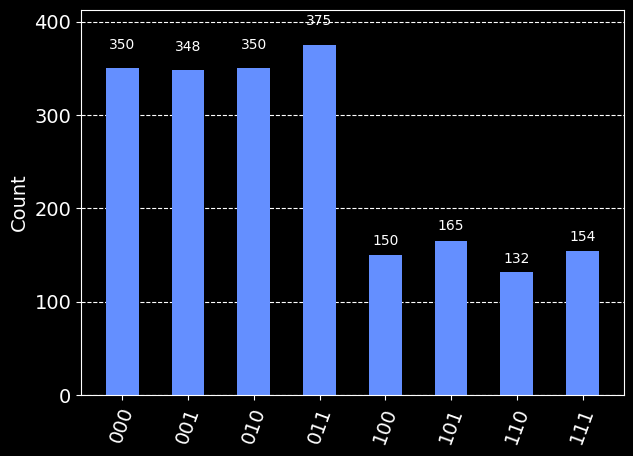

In [5]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

# Loading your account and Running the Circuit via Least Busy Quantum Computer and checking Results

In [6]:
# SAVING AND LOADING YOUR IBM API TOKEN YOU GET WHEN YOU SIGN UP AT IBM QUANTUM COMPUTING 
IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_15248\4250883806.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-04-27 15:36:49,790: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
#Executing the Circuit on Least Busy Quantum Computer
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job is queued (None)

In [ ]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)